In [11]:
from qiskit import *
from qiskit.extensions import *
from qiskit.tools.visualization import *

def AND(inp1,inp2):
    """An AND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """
    
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(2))
  
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()


    # this is where your program for quantum AND gate goes
    qc.ccx(0,1,2) # Toffoli gate
    

    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = AND(inp1, inp2)
        print('AND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

AND with inputs 0 0 gives output 0


░       ░    
q_0: ─|0>──░───■───░────
           ░   │   ░    
q_1: ─|0>──░───■───░────
           ░ ┌─┴─┐ ░ ┌─┐
q_2: ──────░─┤ X ├─░─┤M├
           ░ └───┘ ░ └╥┘
c: 1/═════════════════╩═
                      0



AND with inputs 0 1 gives output 0


░       ░    
q_0: ─|0>───────░───■───░────
          ┌───┐ ░   │   ░    
q_1: ─|0>─┤ X ├─░───■───░────
          └───┘ ░ ┌─┴─┐ ░ ┌─┐
q_2: ───────────░─┤ X ├─░─┤M├
                ░ └───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0



AND with inputs 1 0 gives output 0


┌───┐ ░       ░    
q_0: ─|0>─┤ X ├─░───■───░────
          └───┘ ░   │   ░    
q_1: ─|0>───────░───■───░────
                ░ ┌─┴─┐ ░ ┌─┐
q_2: ───────────░─┤ X ├─░─┤M├
                ░ └───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0



AND with inputs 1 1 gives output 1


┌───┐ ░       ░    
q_0: ─|0>─┤ X ├─░───■───░────
          ├───┤ ░   │   ░    
q_1: ─|0>─┤ X ├─░───■───░────
          └───┘ ░ ┌─┴─┐ ░ ┌─┐
q_2: ───────────░─┤ X ├─░─┤M├
                ░ └───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0

ibmqfactory.load_account:WARNING:2022-03-13 02:38:02,333: Credentials are already in use. The existing account in the session will be replaced.


622d59139e029cbf840df9f8
Job Status: job has successfully run

Probability of correct answer for inputs 0 0
0.94
---------------------------------
622d592d5538eea39ec48af2
Job Status: job has successfully run

Probability of correct answer for inputs 0 1
0.94
---------------------------------
622d594a2fa4e3967dfffc5a
Job Status: job has successfully run

Probability of correct answer for inputs 1 0
0.93
---------------------------------
622d5969a7d9a679cff2df61
Job Status: job has successfully run

Probability of correct answer for inputs 1 1
0.87
---------------------------------


The highest of these probabilities was 0.94
The lowest of these probabilities was 0.87

Transpiled AND gate circuit for ibmq_vigo with input 0 0

The circuit depth : 20
# of nonlocal gates : 9
Probability of correct answer : 0.94

Transpiled AND gate circuit for ibmq_vigo with input 0 1

The circuit depth : 22
# of nonlocal gates : 7
Probability of correct answer : 0.94

Transpiled AND gate circuit for ibmq

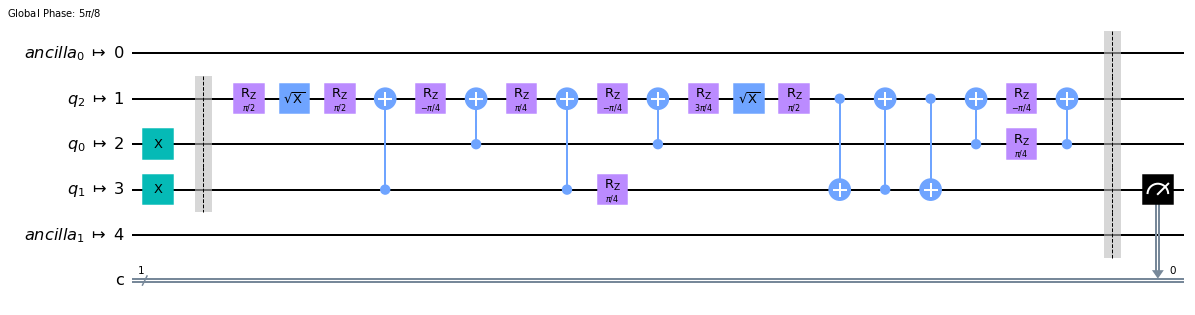

In [8]:
# run the cell to define AND gate for real quantum system
from qiskit import *
from qiskit.extensions import *
from qiskit.tools.visualization import *
from qiskit.tools.monitor import job_monitor
from qiskit import IBMQ 

def AND(inp1, inp2, backend, layout):
    
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()
    qc.ccx(0, 1, 2) 
    qc.barrier()
    qc.measure(2, 0) 
  
    qc_trans = transpile(qc, backend, initial_layout=layout, optimization_level=3)
    job = backend.run(qc_trans, shots=8192)
    print(job.job_id())
    job_monitor(job)
    
    output = job.result().get_counts()
    
    return qc_trans, output


#IBMQ.save_account('')
IBMQ.load_account()
IBMQ.providers()
provider = IBMQ.get_provider('ibm-q')
provider.backends()

backend_ex = provider.get_backend('ibmq_lima')
backend_ex

#from qiskit.providers.ibmq import least_busy
#backends = provider.backends(filters = lambda x:x.configuration().n_qubits >= 2 and not x.configuration().simulator and x.status().operational==True)
#backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and not x.configuration().simulator and x.status().operational==True))
# run this cell
backend = provider.get_backend('ibmq_quito')

layout=None

output_all = []
qc_trans_all = []
prob_all = []

worst = 1
best = 0
for input1 in ['0','1']:
    for input2 in ['0','1']:
        qc_trans, output = AND(input1, input2, backend, layout)
        
        output_all.append(output)
        qc_trans_all.append(qc_trans)
        
        prob = output[str(int( input1=='1' and input2=='1' ))]/8192
        prob_all.append(prob)
        
        print('\nProbability of correct answer for inputs',input1,input2)
        print('{:.2f}'.format(prob) )
        print('---------------------------------')
        
        worst = min(worst,prob)
        best = max(best, prob)
        
print('')
print('\nThe highest of these probabilities was {:.2f}'.format(best))
print('The lowest of these probabilities was {:.2f}'.format(worst))

print('')
print('Transpiled AND gate circuit for ibmq_vigo with input 0 0')
print('\nThe circuit depth : {}'.format (qc_trans_all[0].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[0].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[0]) )
qc_trans_all[0].draw('mpl')

print('')
print('Transpiled AND gate circuit for ibmq_vigo with input 0 1')
print('\nThe circuit depth : {}'.format (qc_trans_all[1].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[1].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[1]) )
qc_trans_all[1].draw('mpl')

print('')
print('Transpiled AND gate circuit for ibmq_vigo with input 1 0')
print('\nThe circuit depth : {}'.format (qc_trans_all[2].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[2].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[2]) )
qc_trans_all[2].draw('mpl')

print('')
print('Transpiled AND gate circuit for ibmq_vigo with input 1 1')
print('\nThe circuit depth : {}'.format (qc_trans_all[3].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[3].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[3]) )
qc_trans_all[3].draw('mpl')